In [1]:
#Aidan Riordands

#import Packages
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import math


C:\Users\aidan\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Introduction

Heart disease is a leading cause of death worldwide, and early detection and prevention are crucial for reducing its impact. In this project, we aim to develop machine learning models that can predict the presence of heart disease based on various patient attributes. By analyzing a dataset containing information about patients' demographics, health characteristics, and medical test results, we seek to identify patterns and relationships that can aid in the accurate prediction of heart disease.

The dataset used in this project contains the following variables:

1. Age: The age of the patient.
2. Sex: The gender of the patient (1 = male, 0 = female).
3. ChestPainType: The type of chest pain experienced by the patient (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic).
4. RestingBP: The resting blood pressure of the patient (in mm Hg).
5. Cholesterol: The serum cholesterol level of the patient (in mg/dl).
6. FastingBS: The fasting blood sugar level of the patient (1 = if FastingBS > 120 mg/dl, 0 = otherwise).
7. RestingECG: The resting electrocardiogram results (Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria).
8. MaxHR: The maximum heart rate achieved by the patient.
9. ExerciseAngina: Whether the patient experienced exercise-induced angina (Y: Yes, N: No).
10. Oldpeak: The oldpeak = ST depression induced by exercise relative to rest.
11. ST_Slope: The slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping).
12. HeartDisease: The presence of heart disease in the patient (1 = disease, 0 = no disease).

Dxpected relationships and meanings of these variables in contributing to heart disease prediction (some) supported by the graphics include:

- Age: Older individuals are generally at a higher risk of developing heart disease.
- Sex: Men are more likely to develop heart disease compared to women, especially at younger ages.
- ChestPainType: Certain types of chest pain, such as typical angina, are more strongly associated with heart disease.
- RestingBP: High resting blood pressure is a risk factor for heart disease.
- Cholesterol: Elevated cholesterol levels, particularly LDL cholesterol, can contribute to the development of heart disease.
- FastingBS: High fasting blood sugar levels may indicate diabetes, which is a risk factor for heart disease.
- RestingECG: Abnormal resting ECG results, such as ST-T wave abnormalities or left ventricular hypertrophy, can be indicative of underlying heart problems.
- MaxHR: A lower maximum heart rate achieved during exercise may suggest reduced cardiovascular fitness and increased risk of heart disease.
- ExerciseAngina: The presence of exercise-induced angina is a strong indicator of coronary artery disease.
- Oldpeak: A larger oldpeak value suggests more severe heart disease.
- ST_Slope: The slope of the peak exercise ST segment can provide information about the presence and severity of coronary artery disease.

By analyzing these variables and their relationships, we aim to build predictive models that can accurately classify patients as having heart disease or not. The project will explore various machine learning algorithms, including decision trees, random forests, logistic regression, XGBoost, and neural networks, to determine the most effective approach for heart disease prediction.

In [2]:
dftrainindx = pd.read_csv("Heart-train-indices(1).csv")
dftestindx = pd.read_csv("Heart-test-indices(1).csv")

In [3]:
trainindx = list(dftrainindx.indices)
testindx = list(dftestindx.indices)
print(testindx[0:5])

[1, 3, 4, 10, 14]


In [4]:
#Initialize dataset as pandas dataframe
df = pd.read_csv("C:/Users/aidan/Downloads/Heart.csv")
np.random.seed(42)
df.head()
#need to set it each time to reset to start of seed

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
# Get basic information about the DataFrame
print("shape = " + str(df.shape))

# Get summary statistics of numerical columns
df.describe()

shape = (303, 14)


,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


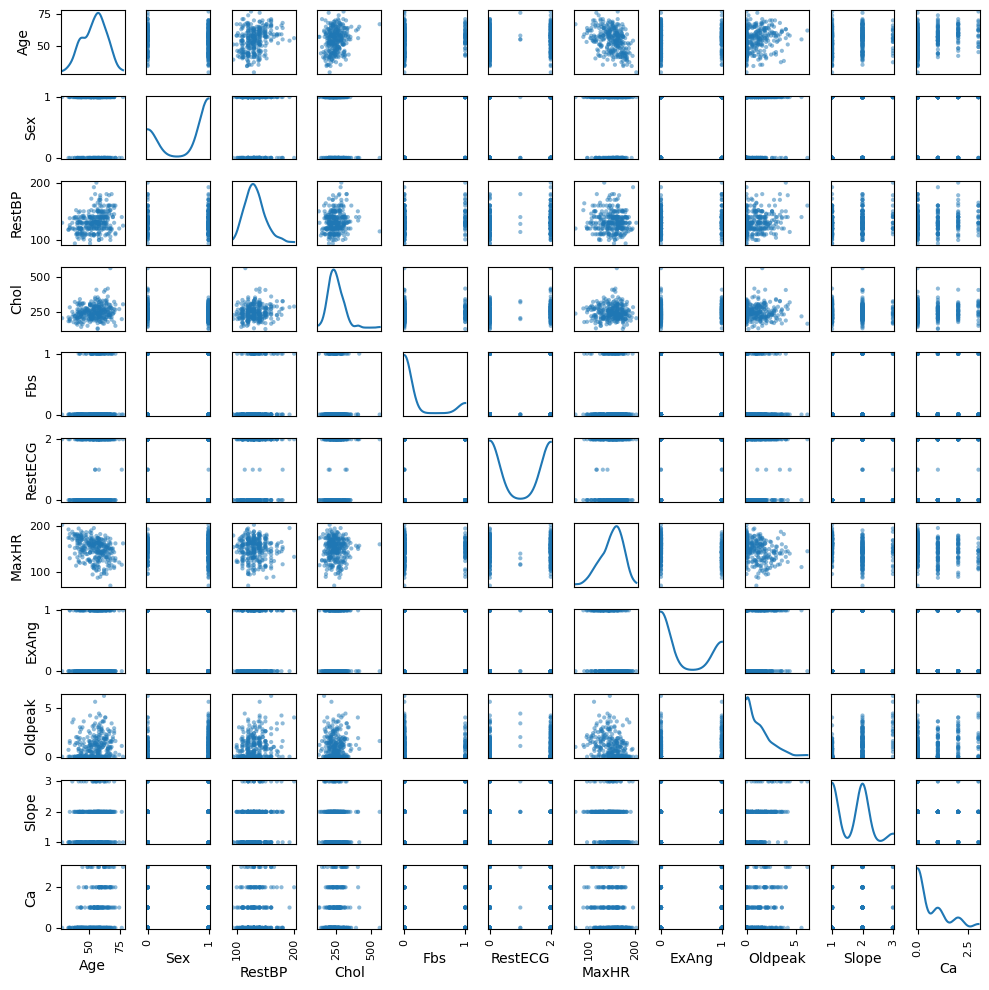

In [6]:
# Select the numeric columns for the scatterplot matrix
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Create the scatterplot matrix
scatter_matrix(df[numeric_columns], figsize=(10, 10), alpha=0.5, diagonal='kde')

# Adjust the subplot spacing
plt.tight_layout()

# Display the plot
plt.show()

#note run this cell after AHD's conversion to numeric datatype to include it in the scatterplot

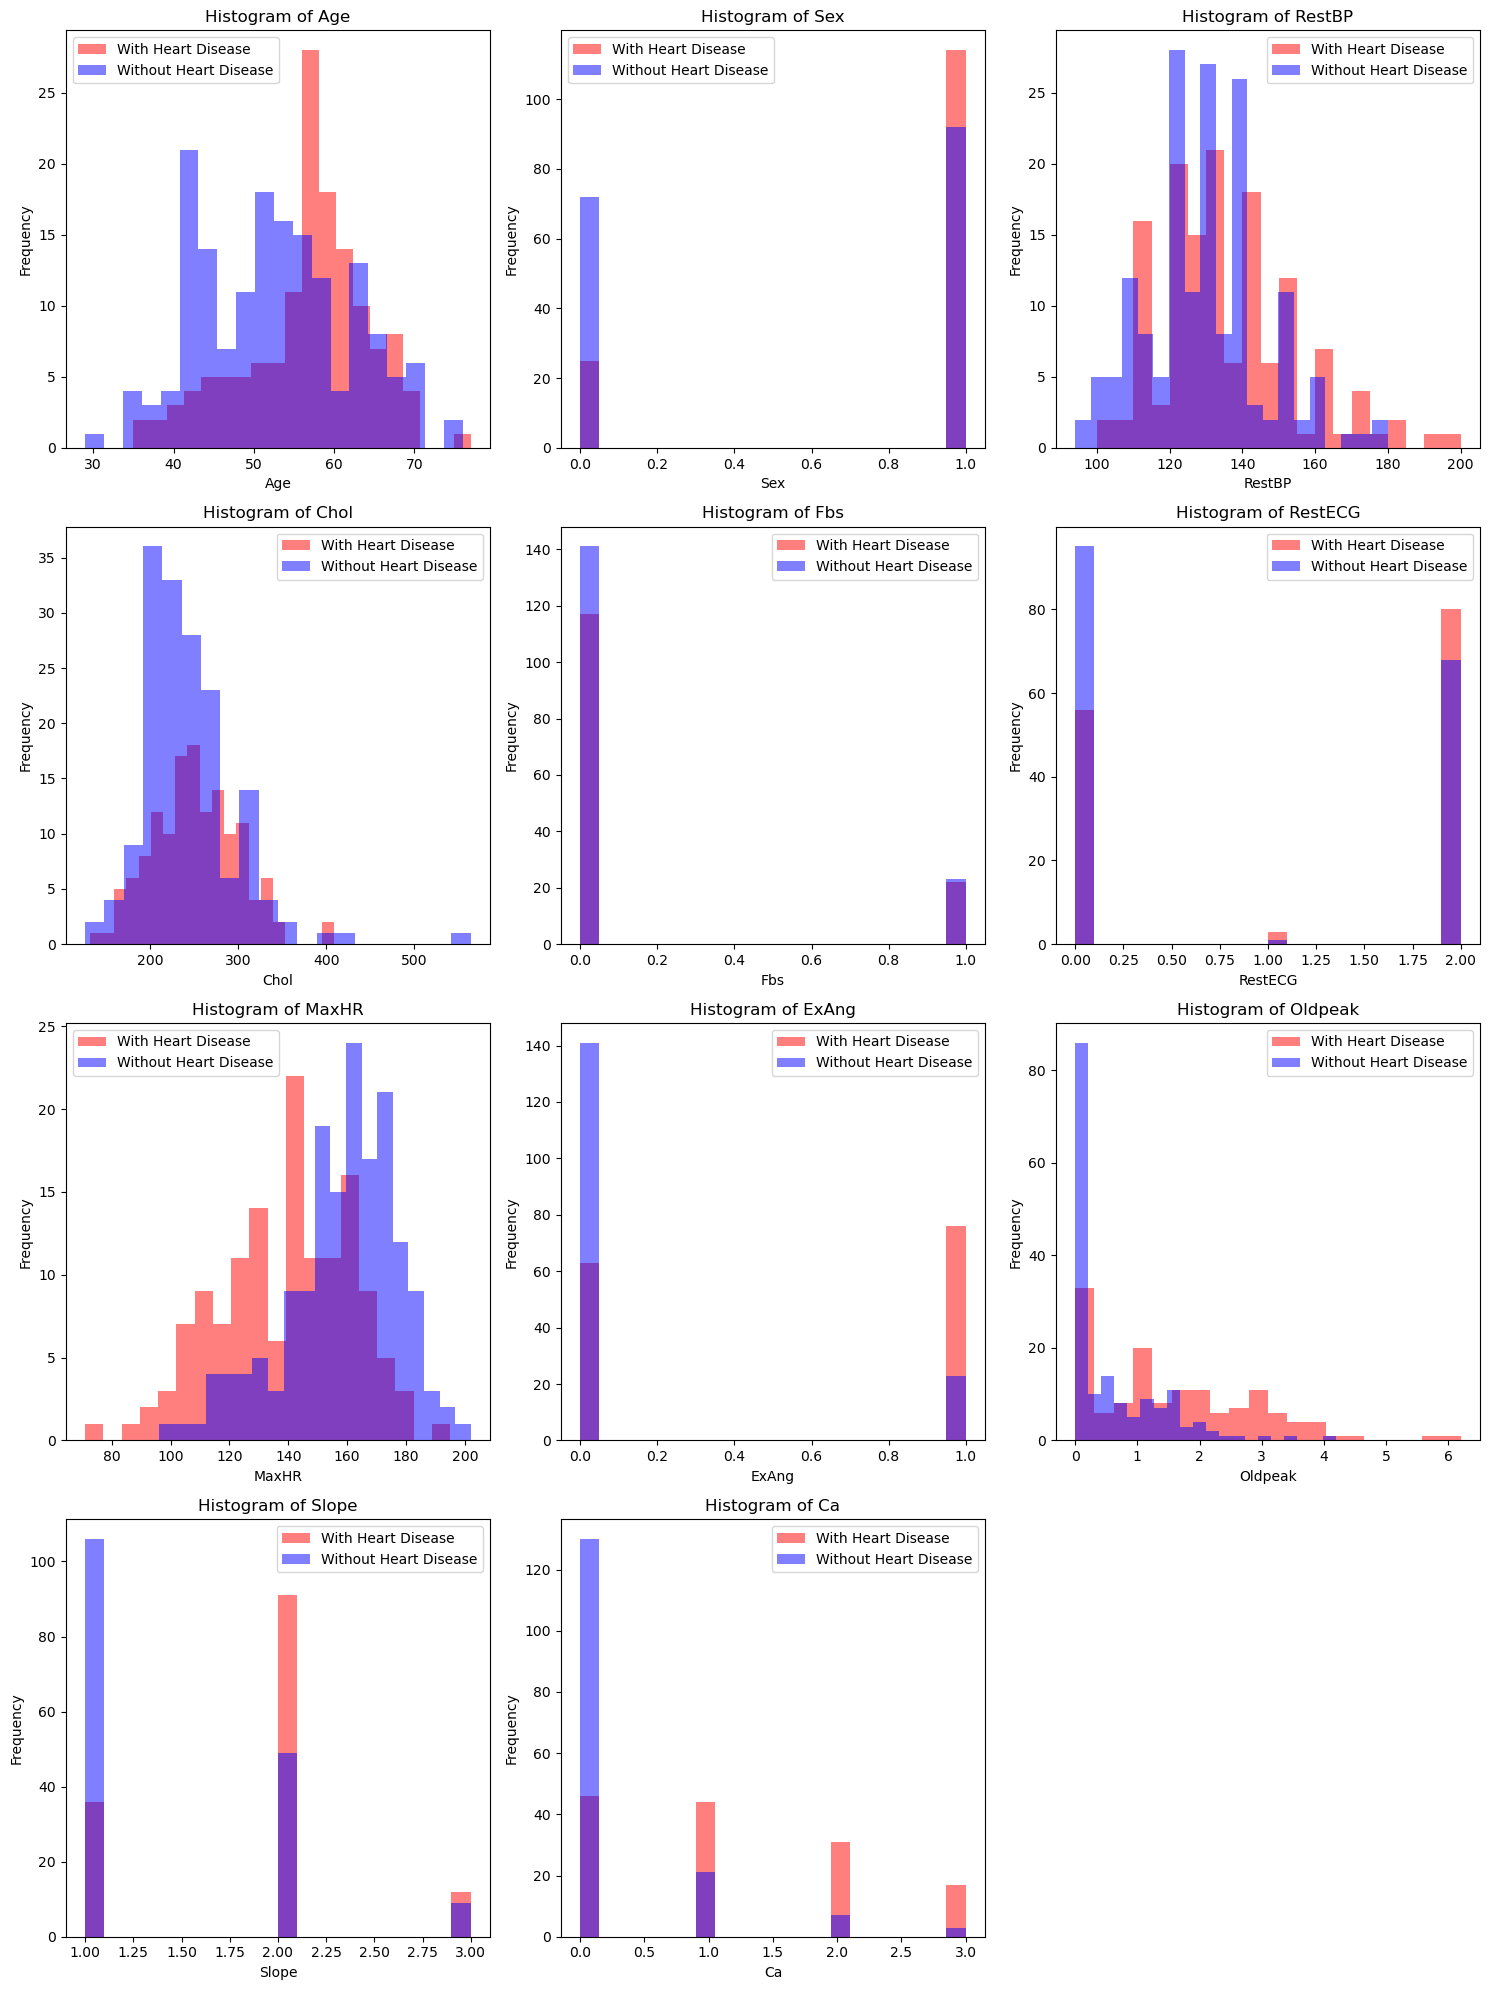

In [7]:
#Get histograms for each numeric value, overlay with / without heart disease 

# Select the numeric columns for the histograms
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculate the number of rows and columns for the subplots
num_columns = len(numeric_columns)
num_rows = math.ceil(num_columns / 3)  # Adjust the number of columns as needed

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))  # Adjust the figure size as needed

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over each numeric column and create the histograms
for i, column in enumerate(numeric_columns):
    # Separate the data based on the presence of heart disease
    data_with_hd = df[df['AHD'] == 'Yes'][column]
    data_without_hd = df[df['AHD'] == 'No'][column]

    # Create the histogram for the current column
    axs[i].hist(data_with_hd, bins=20, alpha=0.5, color='red', label='With Heart Disease')
    axs[i].hist(data_without_hd, bins=20, alpha=0.5, color='blue', label='Without Heart Disease')

    # Set the title and labels for the current subplot
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

# Remove any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [8]:
df.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

# Data Preprocessing

There were 4 missing values in the Ca column. Since this is such a small amount I removed these rows from the dataset, this should have no impact on model performance. We keep the random state consistent for replicability and model comparisions.

In [9]:
#make no = 0 yes = 1
df['AHD'] = df['AHD'].apply(lambda x: 0 if x == 'No' else 1)

X = df.drop('AHD', axis=1)
y = df['AHD']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

#Print missing values
#print("\nMissing values count:")
#print(X.isnull().sum())

#Drop na rows we only saw 4 
X = X.dropna()
y = y[X.index]

#First, we need to adjust the indices in both trainindx and testindx to be zero-based:
trainindx = [i - 1 for i in trainindx]
testindx = [i - 1 for i in testindx]
#Now, let's make sure we're not trying to access any out-of-bounds indices:
trainindx = [i for i in trainindx if i < len(X)]
testindx = [i for i in testindx if i < len(X)]
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X.iloc[trainindx]
X_test = X.iloc[testindx]

# Create train and test sets for target variable (y)
y_train = y.iloc[trainindx]
y_test = y.iloc[testindx]



In [10]:
max(trainindx), max(testindx)

(298, 287)

# Data Mining / Model Fitting

In this section, we explore various machine learning models to predict the presence of heart disease based on the available patient attributes. We evaluate the performance of these models using appropriate evaluation metrics and compare their effectiveness in accurately classifying patients.

The models employed in this analysis include:

1. Decision Tree: A decision tree is a flowchart-like structure where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents an outcome (in this case, the presence or absence of heart disease). The decision tree algorithm learns a hierarchy of if-then-else decision rules from the training data to make predictions.

2. Random Forest: Random forest is an ensemble learning method that combines multiple decision trees. It constructs a multitude of decision trees during training and outputs the mode of the classes predicted by individual trees. Random forests help to reduce overfitting and improve generalization performance.

3. Logistic Regression: Logistic regression is a statistical model that uses a logistic function to model the probability of a binary outcome (in this case, the presence or absence of heart disease). It estimates the relationship between the independent variables (patient attributes) and the dependent variable (heart disease) by fitting a logistic curve to the data.

4. XGBoost: XGBoost (Extreme Gradient Boosting) is an optimized gradient boosting library that implements machine learning algorithms under the Gradient Boosting framework. It combines multiple weak prediction models (decision trees) to create a strong learner. XGBoost is known for its high performance and ability to handle complex datasets. We perform cross-validation and grid search to tune the hyperparameters of the XGBoost model, optimizing for accuracy. The best parameters found through this process are used to train the final XGBoost model.

5. Neural Network: A neural network is a machine learning model inspired by the structure and function of the human brain. It consists of interconnected nodes (neurons) organized in layers. The input layer takes in the patient attributes, and the information flows through the hidden layers, where complex patterns and relationships are learned, to the output layer, which predicts the presence or absence of heart disease. We employ cross-validation and grid search to find the best hyperparameters for the neural network, including the number of hidden layers, nodes per layer, activation function, solver, and learning rate.

Each model is trained on the training dataset and evaluated on the testing dataset to assess its performance. The models are compared based on various evaluation metrics, including sensitivity, specificity, and F1 score, to determine their effectiveness in predicting heart disease.

Sensitivity, also known as recall or true positive rate, measures the proportion of actual positive cases (patients with heart disease) that are correctly identified by the model. It is calculated as TP / (TP + FN), where TP is the number of true positives and FN is the number of false negatives. A high sensitivity indicates that the model is effective in identifying patients with heart disease.

Specificity, also known as true negative rate, measures the proportion of actual negative cases (patients without heart disease) that are correctly identified by the model. It is calculated as TN / (TN + FP), where TN is the number of true negatives and FP is the number of false positives. A high specificity indicates that the model is effective in identifying patients without heart disease.

F1 score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. It is calculated as 2 * (precision * recall) / (precision + recall), where precision is the proportion of true positive predictions among all positive predictions. A high F1 score indicates that the model has a good balance between precision and recall.

Interpreting the feature importance plot from the XGBoost model reveals the relative importance of each variable in predicting heart disease. The plot shows that features such as Oldpeak, MaxHR, and ExerciseAngina have higher importance scores, indicating their significant contribution to the model's predictions. This information can guide healthcare professionals in identifying key risk factors and prioritizing patient assessment and management strategies.

The confusion matrices provide a detailed breakdown of the models' performance, showing the number of true positives, true negatives, false positives, and false negatives. Let's examine the confusion matrix for the XGBoost model with tuned parameters:
<pre>
<code>
Confusion Matrix (XGBoost with tuned parameters):
           Actual
Predicted [[25  5]
          [ 2 29]]
</code>
</pre> 
In this confusion matrix:
- True Negatives (TN) = 25: The model correctly predicted 25 patients as not having heart disease.
- False Positives (FP) = 5: The model incorrectly predicted 5 patients as having heart disease when they actually did not.
- False Negatives (FN) = 2: The model incorrectly predicted 2 patients as not having heart disease when they actually did.
- True Positives (TP) = 29: The model correctly predicted 29 patients as having heart disease.

The high number of true positives (29) and true negatives (25) indicates that the XGBoost model with tuned parameters performs well in correctly classifying patients with and without heart disease. The relatively low number of false positives (5) and false negatives (2) suggests that the model has a good balance between sensitivity and specificity.

Interpreting the best parameters of the neural network provides insights into the optimal architecture and settings for predicting heart disease. The code output provides the best parameters found through grid search for the neural network model:

Best parameters (Neural Network for Heart Disease): {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}

- Activation Function: The best activation function found is 'relu' (Rectified Linear Unit). ReLU is a popular choice for neural networks as it introduces non-linearity and helps in learning complex patterns.

- Alpha: The best value for the alpha parameter is 0.0001. Alpha is the L2 regularization term that helps in controlling overfitting by adding a penalty to the loss function. A smaller value of alpha indicates less regularization and allows the model to fit the training data more closely.

- Hidden Layer Sizes: The best architecture for the neural network has two hidden layers, each with 10 nodes. This configuration defines the complexity and capacity of the neural network to learn intricate relationships in the data.

- Learning Rate: The best learning rate is 'constant', which means that the learning rate remains fixed throughout the training process. A constant learning rate can be effective when the model converges well and does not require adaptive adjustments.

- Solver: The best solver found is 'adam' (Adaptive Moment Estimation). Adam is an optimization algorithm that adapts the learning rate for each parameter based on its historical gradients, allowing for efficient convergence during training.

These best parameters provide insights into the optimal architecture and hyperparameter settings for the neural network model in predicting heart disease. The combination of ReLU activation function, two hidden layers with 10 nodes each, a small regularization term (alpha), a constant learning rate, and the Adam solver contributes to the model's ability to capture complex patterns and achieve good performance.


In [11]:
# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[24  7]
 [ 9 20]]


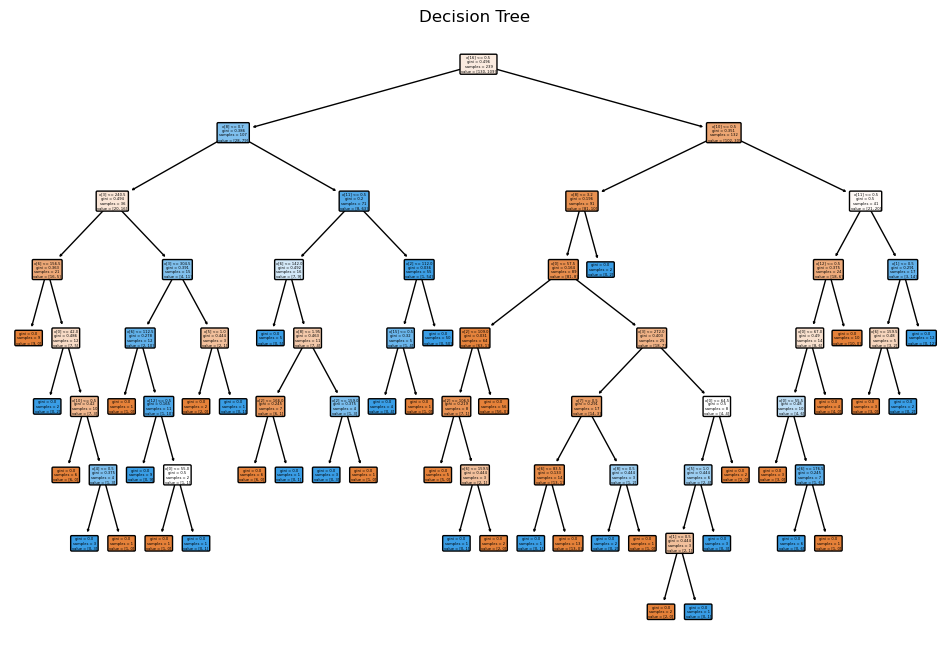

In [12]:
# Plot the decision tree

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

plot_tree(dt, filled=True, rounded=True, 
          #feature_names=X_train.columns, #class_names=dt.classes_,
          ax=ax)

# Set the title
ax.set_title("Decision Tree")

# Remove the axis
ax.axis("off")

# Display the plot
plt.show()

In [13]:
# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[30  1]
 [ 8 21]]


In [14]:
# Create a logistic regression classifier
lr = LogisticRegression(random_state=42)

# Fit the classifier to the training data
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = lr.predict(X_test)

# Print the confusion matrix for logistic regression
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_lr))

Confusion Matrix (Logistic Regression):
[[29  2]
 [ 6 23]]


C:\Users\aidan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Create a xgboost classifier
xgb = XGBClassifier(random_state=39)

xgb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xgb = xgb.predict(X_test)

# Print the confusion matrix for XGBoost
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

Confusion Matrix (XGBoost):
[[29  2]
 [ 7 22]]


In [16]:
#parameter tune xgboost to try to get better results
xgb_tune = XGBClassifier(random_state=39)

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_tune, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Make predictions on the testing data using the best model
y_pred_xgb = grid_search.predict(X_test)

# Print the confusion matrix for XGBoost with tuned parameters
print("Confusion Matrix (XGBoost with tuned parameters):")
print(confusion_matrix(y_test, y_pred_xgb))

Best parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best score:  0.9078921078921078
Confusion Matrix (XGBoost with tuned parameters):
[[30  1]
 [ 8 21]]


Classification Report (XGBoost with tuned parameters):
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        31
           1       0.95      0.72      0.82        29

    accuracy                           0.85        60
   macro avg       0.87      0.85      0.85        60
weighted avg       0.87      0.85      0.85        60

Feature ranking:
1. Thal_normal (0.185327)
2. ChestPain_asymptomatic (0.159899)
3. Ca (0.099126)
4. ExAng (0.077463)
5. Thal_reversable (0.062627)
6. Oldpeak (0.061314)
7. ChestPain_nonanginal (0.049518)
8. Slope (0.048493)
9. Sex (0.040464)
10. MaxHR (0.040382)
11. ChestPain_typical (0.039924)
12. Age (0.038837)
13. Chol (0.030276)
14. RestECG (0.026573)
15. RestBP (0.026458)
16. Fbs (0.004976)
17. Thal_fixed (0.004258)
18. ChestPain_nontypical (0.004084)


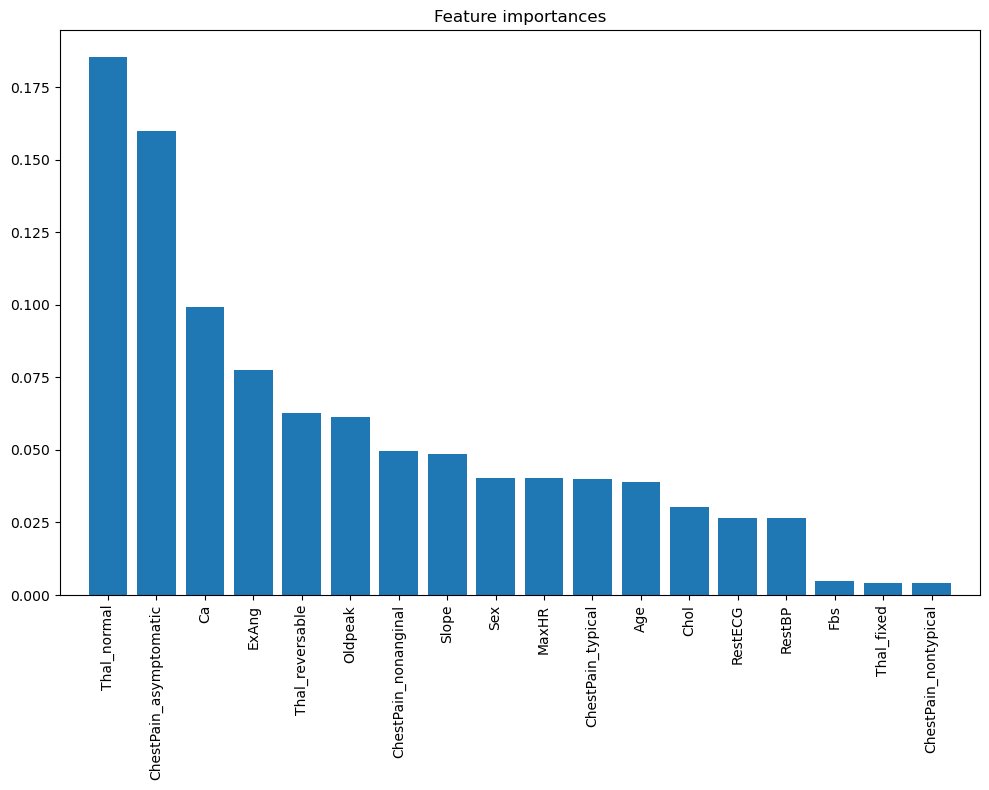

In [17]:
#Accuracy report and Feature importance plot
from sklearn.metrics import classification_report

best_model_xgb = grid_search.best_estimator_

# Print the classification report
print("Classification Report (XGBoost with tuned parameters):")
print(classification_report(y_test, y_pred_xgb))

# Check if the best model is an XGBoost model
if isinstance(best_model_xgb, XGBClassifier):
    # Feature importances
    importances = best_model_xgb.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print feature ranking
    print("Feature ranking:")
    for f in range(X_train.shape[1]):
        print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

    # Plot feature importances
    plt.figure(figsize=(10, 8))
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.tight_layout()
    plt.show()
else:
    print("Feature importances and plotting are not available for the selected model.")

In [18]:
#fit a nural network
nn = MLPClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Perform grid search with cross-validation
grid_search_nn = GridSearchCV(estimator=nn, param_grid=param_grid_nn, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_nn.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters (Neural Network): ", grid_search_nn.best_params_)
print("Best score (Neural Network): ", grid_search_nn.best_score_)

# Make predictions on the testing data using the best model
y_pred_nn = grid_search_nn.predict(X_test)

# Print the confusion matrix for the neural network with tuned parameters
print("Confusion Matrix (Neural Network with tuned parameters):")
print(confusion_matrix(y_test, y_pred_nn))

C:\Users\aidan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aidan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aidan\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\aidan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 753, in fit
    return self._fit(X, y, incremental=False)
  Fil

Best parameters (Neural Network):  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best score (Neural Network):  0.8795204795204796
Confusion Matrix (Neural Network with tuned parameters):
[[30  1]
 [ 9 20]]


In [19]:
# Create a summary of the neural network
best_model = grid_search_nn.best_estimator_
print("\nBest Neural Network Configuration:")
print("Number of layers:", len(best_model.coefs_))
print("Layers size:", [coefs.shape[0] for coefs in best_model.coefs_])
print("Activation function:", best_model.activation)


Best Neural Network Configuration:
Number of layers: 2
Layers size: [18, 100]
Activation function: relu


In [20]:

# Fit a neural network
nn_hd = MLPClassifier(random_state=40)

# Define the parameter grid for tuning
param_grid_nn_hd = {
    'hidden_layer_sizes': [(10,), (20,), (10, 10)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, .01],
    'learning_rate': ['constant', 'adaptive']
}

# Perform grid search with cross-validation
grid_search_nn_hd = GridSearchCV(estimator=nn_hd, param_grid=param_grid_nn_hd, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_nn_hd.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters (Neural Network for Heart Disease):", grid_search_nn_hd.best_params_)
print("Best score (Neural Network for Heart Disease):", grid_search_nn_hd.best_score_)

# Make predictions on the testing data using the best model
y_pred_nn_hd = grid_search_nn_hd.predict(X_test)

# Print the confusion matrix for the neural network with tuned parameters
print("Confusion Matrix (Neural Network with tuned parameters for Heart Disease):")
print(confusion_matrix(y_test, y_pred_nn_hd))

Best parameters (Neural Network for Heart Disease): {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Best score (Neural Network for Heart Disease): 0.7081751581751582
Confusion Matrix (Neural Network with tuned parameters for Heart Disease):
[[29  2]
 [ 9 20]]


C:\Users\aidan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
# Create a summary of the neural network
best_model = grid_search_nn_hd.best_estimator_
print("\nBest Neural Network Configuration:")
print("Number of layers:", len(best_model.coefs_))
print("Layers size:", [coefs.shape[0] for coefs in best_model.coefs_])
print("Activation function:", best_model.activation)


Best Neural Network Configuration:
Number of layers: 3
Layers size: [18, 10, 10]
Activation function: relu


# Model Evaluation & Comparison

Upon evaluating the performance of the different models, we observe that they exhibit similar performance in predicting the presence of heart disease. The tuned XGBoost model does not show significant improvement compared to the standard XGBoost model. Among all the models, the Neural Network demonstrates the best performance.

It is important to note that while there are slight discrepancies in the sensitivity, specificity, and F1 score values across the models, these differences may not be statistically significant. Ideally, we would incorporate a variance metric to assess the statistical significance of these differences and draw more robust conclusions.

Given the nature of the problem at hand, where a type 2 error (false negative) is considered a worse scenario than a type 1 error (false positive), we place more importance on sensitivity. In the context of heart disease prediction, incorrectly classifying a patient as not having heart disease when they actually do (false negative) can have severe consequences. Therefore, when analyzing the ROC curve, we would choose a higher threshold, accepting more false positives in order to capture more true positives.

The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) at various classification thresholds. The area under the ROC curve (AUC) provides a measure of the model's predictive ability. A higher AUC indicates better performance, with a value of 1 representing a perfect classifier. In our analysis, the ROC curves for all models show similar areas under the curve, suggesting comparable overall performance. The points (0, 0) and (1, 1) on the ROC curve represent the extreme cases of classifying all instances as negative (no heart disease) and positive (heart disease), respectively.

To further investigate the performance of the models, we create a DataFrame of the testing set with columns for each model, where 0 indicates an incorrect prediction for a specific datapoint and 1 indicates a correct prediction. Analyzing this DataFrame reveals an interesting pattern. Out of the 60 total datapoints, there are 9 points for which less than 2 models make the correct prediction. This suggests that the models tend to incorrectly predict the same points.

This observation implies that the models have captured most of the information they could from the available features, and the incorrect predictions are not necessarily the fault of the models themselves. Instead, it indicates the presence of noise or limitations in the dataset that hinder perfect prediction. The fact that multiple models struggle with the same datapoints suggests that there might be inherent ambiguity or lack of discriminative information for those specific cases.

In [23]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

# Define a function to calculate sensitivity, specificity, F1 score, and AUC
def calculate_metrics(y_true, y_pred, y_pred_proba):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba)
    return sensitivity, specificity, f1, auc

# Create a dictionary to store the model names and their metrics
model_metrics = {}

# Calculate metrics for each model
model_metrics['Decision Tree'] = calculate_metrics(y_test, y_pred, dt.predict_proba(X_test)[:, 1])
model_metrics['Random Forest'] = calculate_metrics(y_test, y_pred, rf.predict_proba(X_test)[:, 1])
model_metrics['Logistic Regression'] = calculate_metrics(y_test, y_pred_lr, lr.predict_proba(X_test)[:, 1])
model_metrics['XGBoost'] = calculate_metrics(y_test, y_pred_xgb, xgb.predict_proba(X_test)[:, 1])
model_metrics['XGBoost (Tuned)'] = calculate_metrics(y_test, grid_search.predict(X_test), grid_search.predict_proba(X_test)[:, 1])
model_metrics['Neural Network'] = calculate_metrics(y_test, y_pred_nn, grid_search_nn.predict_proba(X_test)[:, 1])

# Print the table
print("{:<20} {:<12} {:<12} {:<12} {:<12}".format('Model', 'Sensitivity', 'Specificity', 'F1 Score', 'AUC Score'))
print("-" * 72)
for model, metrics in model_metrics.items():
    sensitivity, specificity, f1, auc = metrics
    print("{:<20} {:<12.2f} {:<12.2f} {:<12.2f} {:<12.2f}".format(model, sensitivity, specificity, f1, auc))

Model                Sensitivity  Specificity  F1 Score     AUC Score   
------------------------------------------------------------------------
Decision Tree        0.72         0.97         0.82         0.73        
Random Forest        0.72         0.97         0.82         0.93        
Logistic Regression  0.79         0.94         0.85         0.95        
XGBoost              0.72         0.97         0.82         0.91        
XGBoost (Tuned)      0.72         0.97         0.82         0.94        
Neural Network       0.69         0.97         0.80         0.95        


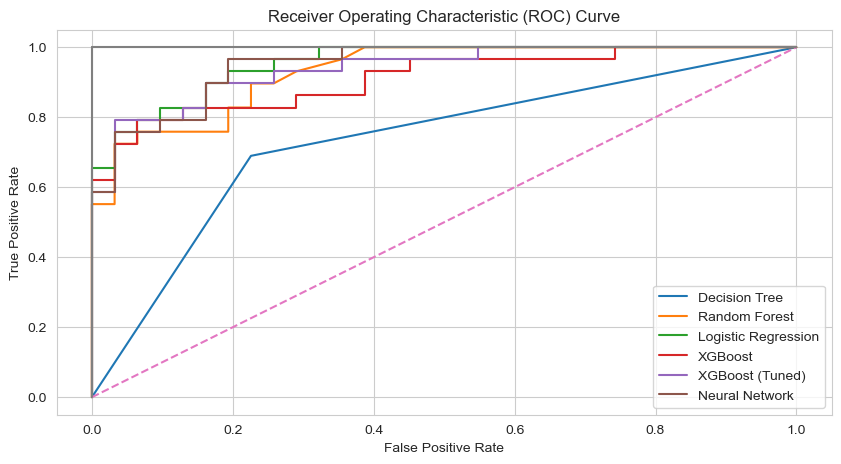

In [24]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate ROC curves for each model
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
xgb_tuned_fpr, xgb_tuned_tpr, xgb_tuned_threshold = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
nn_fpr, nn_tpr, nn_threshold = roc_curve(y_test, grid_search_nn.predict_proba(X_test)[:, 1])

sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')
plt.plot(xgb_tuned_fpr, xgb_tuned_tpr, label='XGBoost (Tuned)')
plt.plot(nn_fpr, nn_tpr, label='Neural Network')
plt.plot([0, 1], ls='--')
plt.plot([0, 0], [1, 0], c='.5')
plt.plot([1, 1], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# 

In [25]:
# Create a DataFrame for the testing set
test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['Actual'] = y_test

# Add columns for each model's predictions
test_df['Decision Tree'] = (y_pred == y_test).astype(int)
test_df['Random Forest'] = (y_pred == y_test).astype(int)
test_df['Logistic Regression'] = (y_pred_lr == y_test).astype(int)
test_df['XGBoost'] = (y_pred_xgb == y_test).astype(int)
test_df['XGBoost (Tuned)'] = (grid_search.predict(X_test) == y_test).astype(int)
test_df['Neural Network'] = (y_pred_nn == y_test).astype(int)
test_df['total correct'] = test_df['Decision Tree']+test_df['Random Forest']+test_df['Logistic Regression']+test_df['XGBoost']+test_df['XGBoost (Tuned)']+test_df['Neural Network']

# Print the table
test_df = test_df.sort_values('total correct')
test_df.head(60)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,...,Thal_normal,Thal_reversable,Actual,Decision Tree,Random Forest,Logistic Regression,XGBoost,XGBoost (Tuned),Neural Network,total correct
290,67,1,152,212,0,2,150,0,0.8,2,...,False,True,1,0,0,0,0,0,0,0
184,60,0,158,305,0,2,161,0,0.0,1,...,True,False,1,0,0,0,0,0,0,0
209,62,0,150,244,0,0,154,1,1.4,2,...,True,False,1,0,0,0,0,0,0,0
107,57,1,128,229,0,2,150,0,0.4,2,...,False,True,1,0,0,0,0,0,0,0
16,48,1,110,229,0,0,168,0,1.0,3,...,False,True,1,0,0,0,0,0,0,0
66,60,1,140,185,0,2,155,0,3.0,2,...,True,False,1,0,0,0,0,0,0,0
271,66,1,160,228,0,2,138,0,2.3,1,...,False,False,0,0,0,0,0,0,0,0
232,49,1,118,149,0,2,126,0,0.8,1,...,True,False,1,0,0,1,0,0,1,2
246,58,1,100,234,0,0,156,0,0.1,1,...,False,True,1,0,0,1,1,1,0,3
180,48,1,124,274,0,2,166,0,0.5,2,...,False,True,1,1,1,1,0,0,0,3


In [26]:
test_df.shape

(60, 26)

# Conclusion

In conclusion, this project demonstrates the application of machine learning techniques for predicting heart disease based on patient attributes. By exploring various models, including decision trees, random forests, logistic regression, XGBoost, and neural networks, we gain insights into their performance and effectiveness in this critical healthcare domain.

The models exhibit similar overall performance, with the Neural Network showing slightly better results. However, the differences in performance metrics may not be statistically significant, and incorporating a variance metric would provide a more comprehensive understanding of the models' effectiveness.

The analysis of the testing set DataFrame highlights the limitations of the dataset and the challenges in perfectly predicting heart disease for certain datapoints. Further investigation into feature engineering, data quality, and potential additional data sources could be explored to enhance the predictive power of the models.

Interpreting the feature importance plot from the XGBoost model and the best parameters of the neural network provides valuable insights into the key factors contributing to heart disease prediction. This information can guide healthcare professionals in making informed decisions and prioritizing patient care strategies.

The applicability of these models to real-world heart disease prediction is promising. Currently, healthcare professionals rely on various clinical assessments, medical tests, and risk factor evaluation to diagnose and predict heart disease. The developed models can serve as a complementary tool to assist in the early identification of high-risk patients, enabling proactive interventions and personalized care plans.

However, it is important to note that the models should not replace the expertise and judgment of healthcare professionals. They should be used in conjunction with clinical assessment and consider the specific context and individual characteristics of each patient.

Future work can focus on refining the models, incorporating additional relevant features, and validating the models on larger and more diverse datasets. Collaboration with healthcare experts can help align the models with clinical practices and ensure their practical utility.

Overall, this project showcases the potential of machine learning in predicting heart disease and highlights the importance of data-driven approaches in improving healthcare outcomes. By leveraging the power of predictive modeling, we can contribute to the early detection and prevention of heart disease, ultimately saving lives and enhancing patient well-being.